# **Analysis of Iranian Immigration Tendency**
Final project of Data Mining Course

The dataset that we used is the information of some people and their tendency to immigrating

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import linear_model

In [ ]:
# Access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading dataset

In [ ]:
# Read dataset from google drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/migration.csv')
df.head()

,scode,scen1_yesim,scen1_noim,scen2_disagree,scen2_agree,scen3_yesim,scen3_noim,scen4_yesim,scen4_noim,scen6_yesim,scen6_noim,scen7_yesim,scen7_noim,scen8_yesim,scen8_noim,scen9_yesim,scen9_noim,scen10_yesim,scen10_noim,scen11_yesim,scen11_noim,r_bestpart,r_helpcommunity,r_heroically,r_hadagreed,r_protectfamily,r_deffered_authority,r_vandalised,r_memberfamily,r_tookmore,r_courage,r_trusted,r_disobeyed,r_membercommunity,r_belong,r_favouritism,r_promis,r_lovefamily,r_damaged,r_unitecommunity,...,j_takeneed,j_current_unfair,immigration_attitude,tendency_immigration,age,gender,education,last_degree,economic,religiosity,political,date,time,IP,duration,g_length,g_width,country,ID,qversion,system,browser,rvs_scen4_yesim,rvs_j_stealfood,rvs_j_keepitem,rvs_j_takeneed,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property
0,1,7.0,1.0,2.0,6.0,2.0,6.0,2.0,5.0,3.0,4.0,5.0,3.0,3.0,3.0,6.0,5.0,3.0,5.0,7.0,2.0,2.0,3.0,1.0,5.0,5.0,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5,3,5,4,5.0,1,...,1.0,5.0,6.0,5.0,21.0,1.0,3.0,NaN,4.0,2.0,5.0,1399/08/09,12:57:00,107.191.49.234,00:12:21,-87.9620,41.9943,US,379770,110,Mozilla/5.0 (Linux; Android 9; Nokia 6.2) Appl...,Chrome - 74.0,6.0,3.0,5,4.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50
1,2,7.0,1.0,2.0,6.0,4.0,4.0,4.0,5.0,6.0,4.0,5.0,3.0,4.0,4.0,3.0,6.0,7.0,1.0,7.0,1.0,3.0,3.0,2.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,3.0,5,5,4,3,4.0,3,...,0.0,4.0,6.0,4.0,23.0,1.0,3.0,NaN,4.0,3.0,3.0,1399/08/09,13:28:00,37.98.63.243,00:15:37,51.5314,35.7555,IR,379776,110,Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like...,Safari - 13.1,4.0,4.0,5,5.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50
2,3,3.0,4.0,2.0,5.0,2.0,5.0,3.0,5.0,2.0,6.0,3.0,3.0,1.0,3.0,2.0,3.0,1.0,6.0,5.0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,5.0,4.0,3.0,5.0,5.0,4.0,3.0,5,3,4,4,5.0,3,...,0.0,4.0,3.0,2.0,20.0,1.0,3.0,NaN,3.0,4.0,2.0,1399/08/09,13:35:00,178.131.24.71,00:12:27,51.5314,35.7555,IR,379779,111,Mozilla/5.0 (Linux; Android 10; SAMSUNG SM-A70...,Chrome - 79.0,5.0,5.0,5,5.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00
3,4,7.0,4.0,2.0,6.0,5.0,5.0,6.0,3.0,5.0,4.0,5.0,6.0,5.0,2.0,6.0,4.0,6.0,4.0,4.0,1.0,3.0,2.0,3.0,5.0,4.0,2.0,5.0,3.0,3.0,4.0,5.0,2.0,2.0,5,3,5,3,4.0,3,...,0.0,4.0,5.0,4.0,16.0,1.0,3.0,NaN,2.0,3.0,3.0,1399/08/09,13:41:00,37.148.30.141,00:13:02,51.4361,35.7838,IR,379781,111,Mozilla/5.0 (Linux; Android 8.0.0; SM-A720F) A...,Chrome - 80.0,2.0,3.0,5,5.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50
4,5,7.0,1.0,3.0,3.0,2.0,6.0,2.0,5.0,6.0,2.0,4.0,4.0,1.0,6.0,1.0,7.0,7.0,1.0,3.0,5.0,2.0,4.0,4.0,5.0,5.0,1.0,5.0,5.0,5.0,4.0,5.0,3.0,4.0,5,5,5,4,5.0,3,...,0.0,5.0,4.0,1.0,21.0,1.0,3.0,NaN,NaN,3.0,NaN,1399/08/09,13:55:00,89.198.224.28,00:10:06,0.0000,0.0000,No,379787,111,Mozilla/5.0 (Linux; Android 10; SM-N975F) Appl...,Chrome - 86.0,6.0,3.0,5,5.0,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67


In [ ]:
df.shape

(334, 101)

# Data cleaning

## Select specific columns

In [ ]:
df = df.drop(df.iloc[:,:63], axis=1)
df = df.drop(df.iloc[:,9:24], axis=1)
# df.drop(['political'], axis=1, inplace=True)
df.head(5)

,immigration_attitude,tendency_immigration,age,gender,education,last_degree,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property
0,6.0,5.0,21.0,1.0,3.0,NaN,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50
1,6.0,4.0,23.0,1.0,3.0,NaN,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50
2,3.0,2.0,20.0,1.0,3.0,NaN,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00
3,5.0,4.0,16.0,1.0,3.0,NaN,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50
4,4.0,1.0,21.0,1.0,3.0,NaN,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67


In [ ]:
df.shape

(334, 23)

Merge 'education' and 'last_degree' columns:

In [ ]:
nan_edu = df[df['education'].isnull()]
nan_edu['last_degree'].isnull().sum()

2

There is only 2 rows that have NAN education and last_degree. So we can eliminate these two rows:

In [ ]:
nan_edu_deg = nan_edu[nan_edu['last_degree'].isnull()]
df = df.drop(nan_edu_deg.index, axis=0)
df.shape

(332, 23)

In [ ]:
# make sure there is not any row with this condition anymore
nan_edu = df[df['education'].isnull()]
nan_edu['last_degree'].isnull().sum()

0

In [ ]:
df.head(20)

,immigration_attitude,tendency_immigration,age,gender,education,last_degree,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property
0,6.0,5.0,21.0,1.0,3.0,NaN,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50
1,6.0,4.0,23.0,1.0,3.0,NaN,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50
2,3.0,2.0,20.0,1.0,3.0,NaN,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00
3,5.0,4.0,16.0,1.0,3.0,NaN,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50
4,4.0,1.0,21.0,1.0,3.0,NaN,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67
5,7.0,4.0,20.0,1.0,3.0,NaN,3.0,3.0,3.0,NaN,2.00,6.00,5.0,NaN,5.67,7.00,3.00,2.17,3.00,2.50,2.67,4.33,3.67
6,6.0,5.0,25.0,1.0,4.0,NaN,4.0,3.0,3.0,3.0,4.75,7.00,5.0,3.0,3.00,4.25,4.83,4.17,4.83,4.50,2.83,4.83,4.83
7,6.0,5.0,22.0,1.0,3.0,NaN,3.0,3.0,3.0,2.5,2.50,6.33,5.0,3.0,5.00,4.00,2.83,4.17,4.33,3.33,2.00,4.33,3.33
8,7.0,5.0,21.0,1.0,2.0,NaN,3.0,2.0,5.0,3.5,2.50,7.00,4.0,1.0,4.25,4.25,4.50,4.67,4.67,4.50,2.67,4.67,5.00
9,5.0,3.0,22.0,2.0,3.0,NaN,3.0,3.0,3.0,1.5,4.25,7.00,4.0,2.0,4.75,4.75,3.83,3.33,4.67,2.17,1.33,3.83,4.67


In [ ]:
def mix_cols(row):
  if np.isnan(row['education']):
    return row['last_degree']
  return row['education']

df['education'] = df.apply(lambda row: mix_cols(row), axis=1)
df.head(20)

,immigration_attitude,tendency_immigration,age,gender,education,last_degree,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property
0,6.0,5.0,21.0,1.0,3.0,NaN,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50
1,6.0,4.0,23.0,1.0,3.0,NaN,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50
2,3.0,2.0,20.0,1.0,3.0,NaN,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00
3,5.0,4.0,16.0,1.0,3.0,NaN,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50
4,4.0,1.0,21.0,1.0,3.0,NaN,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67
5,7.0,4.0,20.0,1.0,3.0,NaN,3.0,3.0,3.0,NaN,2.00,6.00,5.0,NaN,5.67,7.00,3.00,2.17,3.00,2.50,2.67,4.33,3.67
6,6.0,5.0,25.0,1.0,4.0,NaN,4.0,3.0,3.0,3.0,4.75,7.00,5.0,3.0,3.00,4.25,4.83,4.17,4.83,4.50,2.83,4.83,4.83
7,6.0,5.0,22.0,1.0,3.0,NaN,3.0,3.0,3.0,2.5,2.50,6.33,5.0,3.0,5.00,4.00,2.83,4.17,4.33,3.33,2.00,4.33,3.33
8,7.0,5.0,21.0,1.0,2.0,NaN,3.0,2.0,5.0,3.5,2.50,7.00,4.0,1.0,4.25,4.25,4.50,4.67,4.67,4.50,2.67,4.67,5.00
9,5.0,3.0,22.0,2.0,3.0,NaN,3.0,3.0,3.0,1.5,4.25,7.00,4.0,2.0,4.75,4.75,3.83,3.33,4.67,2.17,1.33,3.83,4.67


In [ ]:
df['education'].isnull().sum()

0

There is no NAN values in education column.

Now we can drop 'last_degree' column:

In [ ]:
df = df.drop(columns="last_degree")
df.head()

,immigration_attitude,tendency_immigration,age,gender,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property
0,6.0,5.0,21.0,1.0,3.0,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50
1,6.0,4.0,23.0,1.0,3.0,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50
2,3.0,2.0,20.0,1.0,3.0,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00
3,5.0,4.0,16.0,1.0,3.0,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50
4,4.0,1.0,21.0,1.0,3.0,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67


In [ ]:
# Display total number of missing values for each column (sorted from highest to lowest one) after all cleanings
def missing_table(dataset):
  total = dataset.isnull().sum().sort_values(ascending=False)
  percent = (dataset.isnull().sum() / dataset.isnull().count()).sort_values(ascending=False)
  missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
  return missing_data.T

missing_table(df)

,img_deference,img_heroism,age,political,img_family,economic,religiosity,img_fairness,img_Reciprocity,tendency_immigration,gender,immigration_attitude,img_property,img_group,mac_fairness,mac_family,mac_group,education,mac_reciprocity,mac_heroism,mac_deference,mac_property
total,17.000000,14.000000,8.000000,8.000000,7.000000,5.00000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.051205,0.042169,0.024096,0.024096,0.021084,0.01506,0.009036,0.006024,0.003012,0.003012,0.003012,0.003012,0.003012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove row with NAN value of label
df = df.drop(df[df['tendency_immigration'].isnull()].index, axis=0)
df = df.drop(df[df['immigration_attitude'].isnull()].index, axis=0)
df.shape

(330, 22)

In [ ]:
# fill the only row with NAN gender to 'Men'
nan_gen = df[df['gender'].isnull()]
df.loc[nan_gen.index, 'gender'] = 2

In [ ]:
missing_table(df)

,img_deference,img_heroism,age,political,img_family,economic,religiosity,img_fairness,img_Reciprocity,img_property,tendency_immigration,gender,education,mac_property,img_group,mac_fairness,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,immigration_attitude
total,17.000000,14.000000,8.000000,8.000000,7.000000,5.000000,3.000000,2.000000,1.00000,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.051515,0.042424,0.024242,0.024242,0.021212,0.015152,0.009091,0.006061,0.00303,0.00303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# One Hot Encoding
df = pd.get_dummies(df, columns=["gender"])
df = df.rename(columns={'gender_1.0':'woman', 'gender_2.0':'man'})
df.head(5)

,immigration_attitude,tendency_immigration,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,woman,man
0,6.0,5.0,21.0,3.0,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50,1,0
1,6.0,4.0,23.0,3.0,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50,1,0
2,3.0,2.0,20.0,3.0,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00,1,0
3,5.0,4.0,16.0,3.0,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50,1,0
4,4.0,1.0,21.0,3.0,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67,1,0


In [ ]:
# To reach binary classification later
df['tendency_immigration'] = df['tendency_immigration'] > 4
df.head()

,immigration_attitude,tendency_immigration,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,woman,man
0,6.0,True,21.0,3.0,4.0,2.0,5.0,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50,1,0
1,6.0,False,23.0,3.0,4.0,3.0,3.0,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50,1,0
2,3.0,False,20.0,3.0,3.0,4.0,2.0,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00,1,0
3,5.0,False,16.0,3.0,2.0,3.0,3.0,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50,1,0
4,4.0,False,21.0,3.0,NaN,3.0,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67,1,0


In [ ]:
def changeLabel(value):
  if pd.isnull(value):
    return value
  return str(int(value))

def changeType(column_name):
  df[column_name] = df.apply(lambda row: changeLabel(row[column_name]), axis=1)

In [ ]:
# changeType('tendency_immigration')
changeType('education')
changeType('economic')
changeType('religiosity')
changeType('political')
changeType('immigration_attitude')
df.head(5)

,immigration_attitude,tendency_immigration,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,woman,man
0,6,True,21.0,3,4,2,5,3.5,4.00,5.67,4.0,2.0,5.00,3.50,3.50,3.17,4.83,2.83,1.83,3.00,4.50,1,0
1,6,False,23.0,3,4,3,3,4.0,3.50,7.00,2.0,4.0,4.00,4.25,3.33,3.00,3.83,2.67,2.67,3.67,4.50,1,0
2,3,False,20.0,3,3,4,2,2.5,5.00,3.00,4.5,2.0,3.25,2.50,3.83,3.17,3.67,4.67,3.33,3.33,5.00,1,0
3,5,False,16.0,3,2,3,3,3.0,3.25,5.67,5.0,5.0,4.50,4.25,3.50,2.67,4.83,3.83,2.33,3.33,4.50,1,0
4,4,False,21.0,3,NaN,3,NaN,5.0,3.50,5.67,2.5,2.0,4.25,3.75,4.83,4.00,4.83,3.83,2.67,3.67,4.67,1,0


In [ ]:
category_type = pd.CategoricalDtype(categories=['1', '2', '3', '4', '5', '6', '7'], ordered=True)
# df['tendency_immigration'].astype(category_type)
df['education'].astype(category_type)
df['economic'].astype(category_type)
df['religiosity'].astype(category_type)
df['political'].astype(category_type)
df['immigration_attitude'].astype(category_type)

0      6
1      6
2      3
3      5
4      4
      ..
329    7
330    7
331    7
332    5
333    6
Name: immigration_attitude, Length: 330, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']

## Create Training and Test Sets

In [ ]:
# Split-out validation dataset
X = df[list(df.columns)]
X.drop(['tendency_immigration'], axis=1, inplace=True)
y = df['tendency_immigration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
# describes info about train and test set 
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (297, 22)
y_train dataset:  (297,)
X_test dataset:  (33, 22)
y_test dataset:  (33,)


## Handle Missing Values

In [ ]:
# fill NAN 'age' in test and train sets with mean value of train set
X_train['age'].fillna(np. floor(np.nanmean(X_train['age'])), inplace = True)
X_test['age'].fillna(np.nanmean(X_train['age']), inplace = True)

# check all NAN values filled in 'age' column
print(X_train['age'].isnull().sum())
print(X_test['age'].isnull().sum())

0
0


In [ ]:
# find possible values for economic column
print(df['economic'].unique())

['4' '3' '2' nan '5' '1']


In [ ]:
# fill NAN 'economic' in test and train sets with middle of possible values(3)
X_train['economic'].fillna('3', inplace = True)
X_test['economic'].fillna('3', inplace = True)

# check all NAN values filled in 'economic' column
print(X_train['economic'].isnull().sum())
print(X_test['economic'].isnull().sum())

0
0


In [ ]:
# find possible values for religiosity column
print(df['religiosity'].unique())

['2' '3' '4' '1' '5' nan]


In [ ]:
# fill NAN 'religiosity' in test and train sets with middle of possible values(3)
X_train['religiosity'].fillna('3', inplace = True)
X_test['religiosity'].fillna('3', inplace = True)

# check all NAN values filled in 'religiosity' column
print(X_train['religiosity'].isnull().sum())
print(X_test['religiosity'].isnull().sum())

0
0


In [ ]:
# find possible values for political column
print(df['political'].unique())

['5' '3' '2' nan '4' '1']


In [ ]:
# fill NAN 'political' in test and train sets with middle of possible values(3)
X_train['political'].fillna('3', inplace = True)
X_test['political'].fillna('3', inplace = True)

# check all NAN values filled in 'political' column
print(X_train['political'].isnull().sum())
print(X_test['political'].isnull().sum())

0
0


In [ ]:
X_train['img_deference'].fillna(np.nanmean(X_train['img_deference']), inplace = True)
X_test['img_deference'].fillna(np.nanmean(X_train['img_deference']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_deference'].isnull().sum())
print(X_test['img_deference'].isnull().sum())

0
0


In [ ]:
X_train['img_heroism'].fillna(np.nanmean(X_train['img_heroism']), inplace = True)
X_test['img_heroism'].fillna(np.nanmean(X_train['img_heroism']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_heroism'].isnull().sum())
print(X_test['img_heroism'].isnull().sum())

0
0


In [ ]:
X_train['img_family'].fillna(np.nanmean(X_train['img_family']), inplace = True)
X_test['img_family'].fillna(np.nanmean(X_train['img_family']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_family'].isnull().sum())
print(X_test['img_family'].isnull().sum())

0
0


In [ ]:
X_train['img_fairness'].fillna(np.nanmean(X_train['img_fairness']), inplace = True)
X_test['img_fairness'].fillna(np.nanmean(X_train['img_fairness']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_fairness'].isnull().sum())
print(X_test['img_fairness'].isnull().sum())

0
0


In [ ]:
X_train['img_property'].fillna(np.nanmean(X_train['img_property']), inplace = True)
X_test['img_property'].fillna(np.nanmean(X_train['img_property']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_property'].isnull().sum())
print(X_test['img_property'].isnull().sum())

0
0


In [ ]:
X_train['img_Reciprocity'].fillna(np.nanmean(X_train['img_Reciprocity']), inplace = True)
X_test['img_Reciprocity'].fillna(np.nanmean(X_train['img_Reciprocity']), inplace = True)

# check all NAN values filled in 'political' column
print(X_train['img_Reciprocity'].isnull().sum())
print(X_test['img_Reciprocity'].isnull().sum())

0
0


In [ ]:
missing_table(X_train)

,man,woman,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,immigration_attitude
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
missing_table(X_test)

,man,woman,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,immigration_attitude
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.head()

,immigration_attitude,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,woman,man
328,6,25.0,4,3,3,3,4.0,4.33,6.22,3.33,2.67,4.33,3.33,3.83,3.83,4.33,3.00,1.83,4.50,3.83,1,0
134,1,18.0,3,2,4,2,4.5,6.75,3.33,6.50,1.00,4.00,4.00,4.17,4.17,4.33,4.17,3.50,4.17,4.00,0,1
320,7,24.0,4,3,4,3,2.0,4.00,6.67,3.33,6.67,4.00,4.00,3.67,3.17,4.50,3.67,1.80,4.50,4.33,1,0
225,7,23.0,4,3,3,2,4.0,3.00,4.00,4.67,5.33,3.33,4.00,3.83,3.33,3.67,3.17,2.83,3.50,2.33,1,0
172,7,21.0,3,3,2,3,3.5,2.25,6.67,1.50,5.00,5.25,4.50,2.00,3.00,4.50,2.83,1.67,3.83,3.50,1,0


## Feature Extraction


In [ ]:
X_train['age_eco_tend'] = ~((X_train['age'] > 30) & (X_train['economic'] < str(4)))
X_test['age_eco_tend'] = ~((X_test['age'] > 30) & (X_test['economic'] < str(4)))

X_train.head(10)

,immigration_attitude,age,education,economic,religiosity,political,img_family,img_group,img_Reciprocity,img_heroism,img_deference,img_fairness,img_property,mac_family,mac_group,mac_reciprocity,mac_heroism,mac_deference,mac_fairness,mac_property,woman,man,age_eco_tend
328,6,25.0,4,3,3,3,4.0,4.33,6.22,3.33,2.670000,4.33000,3.33,3.83,3.83,4.33,3.00,1.83,4.50,3.83,1,0,True
134,1,18.0,3,2,4,2,4.5,6.75,3.33,6.50,1.000000,4.00000,4.00,4.17,4.17,4.33,4.17,3.50,4.17,4.00,0,1,True
320,7,24.0,4,3,4,3,2.0,4.00,6.67,3.33,6.670000,4.00000,4.00,3.67,3.17,4.50,3.67,1.80,4.50,4.33,1,0,True
225,7,23.0,4,3,3,2,4.0,3.00,4.00,4.67,5.330000,3.33000,4.00,3.83,3.33,3.67,3.17,2.83,3.50,2.33,1,0,True
172,7,21.0,3,3,2,3,3.5,2.25,6.67,1.50,5.000000,5.25000,4.50,2.00,3.00,4.50,2.83,1.67,3.83,3.50,1,0,True
104,5,33.0,3,3,4,3,2.0,2.00,1.00,2.00,1.000000,4.30478,1.50,4.67,4.50,4.67,4.67,4.33,4.33,4.67,0,1,False
91,6,33.0,6,4,2,5,4.0,5.50,3.00,7.00,1.000000,2.50000,4.00,3.50,3.67,4.50,3.83,4.33,4.17,2.17,1,0,True
106,5,46.0,4,4,3,3,7.0,1.00,7.00,4.50,3.440603,2.25000,4.33,3.83,4.00,4.00,2.83,2.83,4.00,4.50,0,1,True
80,5,33.0,6,3,4,3,2.0,3.00,6.00,4.00,4.000000,3.75000,6.00,4.50,4.67,4.17,4.67,3.33,4.00,4.50,0,1,False
15,5,22.0,3,3,3,3,4.0,4.00,4.33,3.50,2.000000,3.25000,4.00,3.17,4.17,3.83,3.67,2.50,4.00,4.17,1,0,True


# Plots


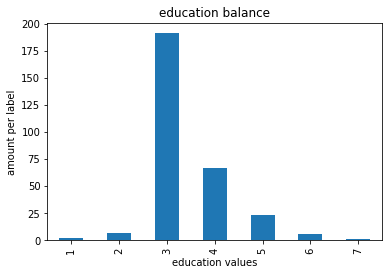

In [ ]:
plt.title('label balance in train set')
X_train['education'].value_counts().sort_index().plot(kind='bar')
plt.title('education balance')
plt.xlabel('education values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
X_train['education'].unique()

array(['4', '3', '6', '5', '2', '7', '1'], dtype=object)

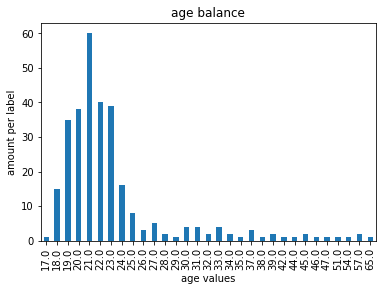

In [ ]:
plt.title('label balance in train set')
X_train['age'].value_counts().sort_index().plot(kind='bar')
plt.title('age balance')
plt.xlabel('age values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
X_train['economic'].unique()

array(['3', '2', '4', '1', '5'], dtype=object)

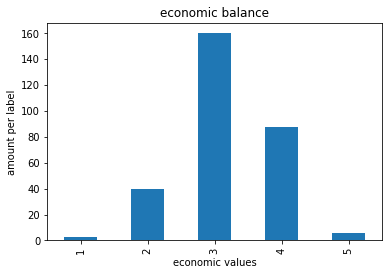

In [ ]:
plt.title('label balance in train set')
X_train['economic'].value_counts().sort_index().plot(kind='bar')
plt.title('economic balance')
plt.xlabel('economic values')
plt.ylabel('amount per label')
plt.show()

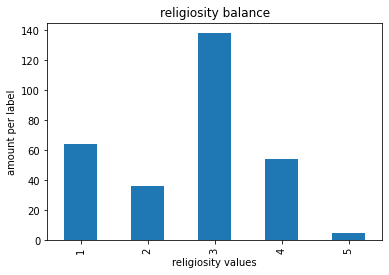

In [ ]:
plt.title('label balance in train set')
X_train['religiosity'].value_counts().sort_index().plot(kind='bar')
plt.title('religiosity balance')
plt.xlabel('religiosity values')
plt.ylabel('amount per label')
plt.show()

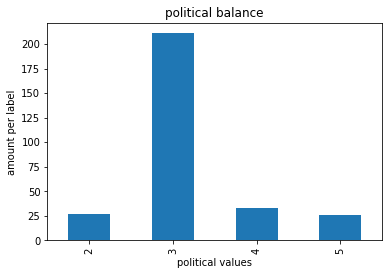

In [ ]:
plt.title('label balance in train set')
X_train['political'].value_counts().sort_index().plot(kind='bar')
plt.title('political balance')
plt.xlabel('political values')
plt.ylabel('amount per label')
plt.show()
# X_train['political'].unique()

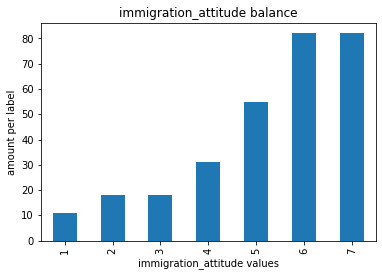

In [ ]:
plt.title('label balance in train set')
X_train['immigration_attitude'].value_counts().sort_index().plot(kind='bar')
plt.title('immigration_attitude balance')
plt.xlabel('immigration_attitude values')
plt.ylabel('amount per label')
plt.show()

In [ ]:
number_of_men = X_train['man'].sum()
number_of_women = X_train['woman'].sum()
print('number of men : ', number_of_men)
print('number of women : ', number_of_women)

number of men :  118
number of women :  179


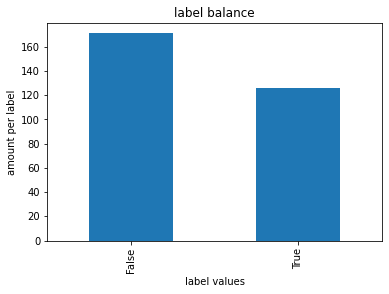

In [ ]:
plt.title('label balance in train set')
y_train.value_counts().sort_index().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

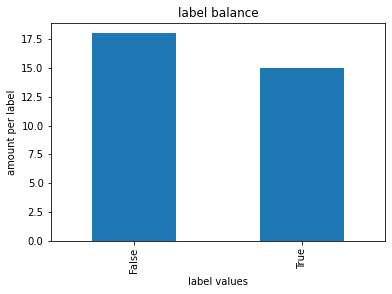

In [ ]:
plt.title('label balance in train set')
y_test.value_counts().sort_index().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

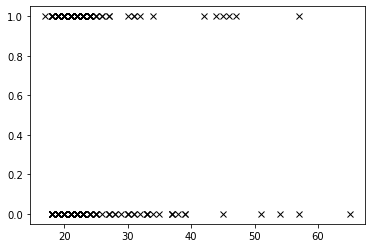

In [ ]:
plt.plot(X_train['age'], y_train, 'x', color='black')

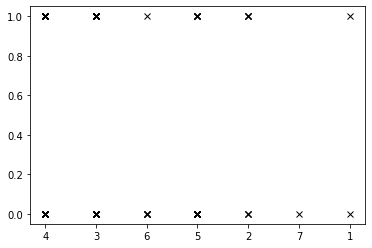

In [ ]:
plt.plot(X_train['education'], y_train, 'x', color='black')

# Classifier

## Normalization & Balancing

In [ ]:
# apply Smote on train set to get balanced training set
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 

In [ ]:
# apply near miss on train set
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train, y_train = nr.fit_sample(X_train, y_train.ravel()) 
print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 

After Undersampling, counts of label '1': 126
After Undersampling, counts of label '0': 126


In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing data
X_test = norm.transform(X_test)

## Models


In [ ]:
def predict(clf):
  predictions = clf.predict(X_test)
  print(classification_report(y_test, predictions)) 
  print(accuracy_score(y_test, predictions))

### Decision Tree

In [ ]:
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
predict(clf)

              precision    recall  f1-score   support

       False       0.90      1.00      0.95        18
        True       1.00      0.87      0.93        15

    accuracy                           0.94        33
   macro avg       0.95      0.93      0.94        33
weighted avg       0.95      0.94      0.94        33

0.9393939393939394


### Logistic Regression

In [ ]:
logistic_regression = Pipeline([('clf', linear_model.LogisticRegression(n_jobs=1, C=1e5))]);
model = logistic_regression.fit(X_train, y_train)
predict(model)   

              precision    recall  f1-score   support

       False       0.89      0.94      0.92        18
        True       0.93      0.87      0.90        15

    accuracy                           0.91        33
   macro avg       0.91      0.91      0.91        33
weighted avg       0.91      0.91      0.91        33

0.9090909090909091


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)
predict(classifier)

              precision    recall  f1-score   support

       False       0.82      1.00      0.90        18
        True       1.00      0.73      0.85        15

    accuracy                           0.88        33
   macro avg       0.91      0.87      0.87        33
weighted avg       0.90      0.88      0.88        33

0.8787878787878788


### SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
predict(svclassifier)

              precision    recall  f1-score   support

       False       0.85      0.94      0.89        18
        True       0.92      0.80      0.86        15

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33

0.8787878787878788


### Random Forest

Using Grid search to find best parameters:

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# rfc = RandomForestClassifier(class_weight='balanced')
# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [ ]:
# rf_random.best_params_

In [ ]:
# best_random = rf_random.best_estimator_
# predictions = best_random.predict(X_test)
# print(classification_report(y_test, predictions)) 
# print(accuracy_score(y_test, predictions))

Now using best parameters calculated from grid search:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier(bootstrap= True, 
                            max_depth= 30,
                            max_features= 'sqrt',
                            min_samples_leaf= 1,
                            min_samples_split= 5,
                            n_estimators= 400, class_weight='balanced')
rfc.fit(X_train, y_train)
predict(rfc)

              precision    recall  f1-score   support

       False       0.95      1.00      0.97        18
        True       1.00      0.93      0.97        15

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33

0.9696969696969697


### NB

In [ ]:
model3 =  MultinomialNB().fit(X_train, y_train)
predict(model3)

              precision    recall  f1-score   support

       False       0.85      0.94      0.89        18
        True       0.92      0.80      0.86        15

    accuracy                           0.88        33
   macro avg       0.89      0.87      0.88        33
weighted avg       0.88      0.88      0.88        33

0.8787878787878788


# Cluster

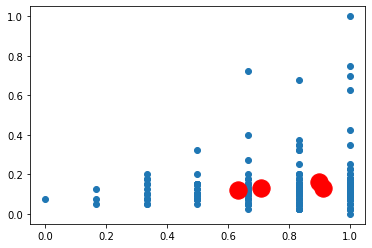

In [ ]:
# Try to cluster data with k-means approach... Just for fun:)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_train)
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [ ]:
df2 = df[list(df.columns)]
df2.drop(['woman', 'man','img_family','img_group','img_Reciprocity','img_heroism','img_deference','img_fairness','img_property', 'mac_family',	'mac_group',	'mac_reciprocity',	'mac_heroism',	'mac_deference',	'mac_fairness',	'mac_property'], axis=1, inplace=True)
df2.head()

,immigration_attitude,tendency_immigration,age,education,economic,religiosity,political
0,6,True,21.0,3,4,2,5
1,6,False,23.0,3,4,3,3
2,3,False,20.0,3,3,4,2
3,5,False,16.0,3,2,3,3
4,4,False,21.0,3,NaN,3,NaN


In [ ]:
#Importing required modules
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
df2 = df2.fillna(0)
print(df2.columns)
data = df2
pca = PCA(2)
#Transform the data
df2 = pca.fit_transform(data)
df2.shape

Index(['immigration_attitude', 'tendency_immigration', 'age', 'education',
       'economic', 'religiosity', 'political'],
      dtype='object')


(330, 2)

In [ ]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans()
 
#predict the labels of clusters.
label = kmeans.fit_predict(df2)
 
print(np.unique(label))

[0 1 2 3 4 5 6 7]
